<a href="https://colab.research.google.com/github/abhipsa14/gsc/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
from huggingface_hub import hf_hub_download

nltk.download('punkt', quiet=False)

# Verify the download paths
print(f"NLTK data paths: {nltk.data.path}")

# Verify that punkt is available
try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer is available.")
except LookupError:
    print("Punkt tokenizer is NOT available.")

from huggingface_hub import hf_hub_download


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK data paths: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
Punkt tokenizer is available.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
df = pd.read_csv("hf://datasets/wldnjs057/diary_entry/test60.csv")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
df.head()

,id,diary_entry,food,philosophy podcast,drinking,coffee,watching,a fun event,I was stressed,all day,...,celebrating birthday,feeling uneasy,new game I played,something exciting and fun,i was in pain,holiday season,turkey eating experience,planning for christmas,I wanted to do something but that did not go well as I thought,hard day
0,0,I woke up to the pitter-patter of rain this mo...,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"Watched ""The Glory"" with Sarah, and it's truly...",0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,"I went to the Usher concert last night, and it...",0,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3,Sitting by the sea with a latte is one of the ...,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,I finally completed my assignment by midnight....,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df['diary_entry'].values[0]

'I woke up to the pitter-patter of rain this morning and felt an urge to escape my routine. I decided to head to my favorite little cafe, the one tucked away on a quaint side street. The coffee at that cafe is always amazing. The rich aroma enveloped me the moment I stepped inside, warming away the chill of the outside world.'

EDA

Text(0.5, 0, 'Hard Day')

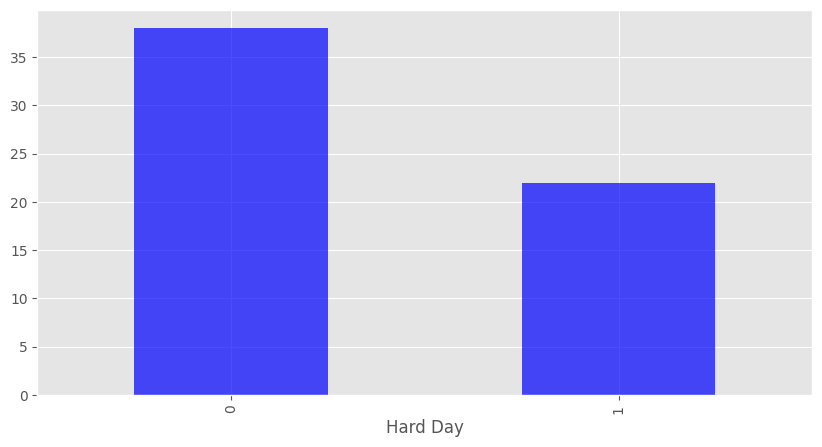

In [6]:
ax=df['hard day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)
ax.set_xlabel("Hard Day")

In [7]:
## NLTK
example = df['diary_entry'][10]
example

"The workload for the NLP class was overwhelming. I found myself relentlessly working without a break. From 9 AM to 11 PM, I couldn't afford a moment away from my chair. It's like time just slipped by as I juggled between assignments, each one more challenging than the last. My brain was constantly buzzing, trying to grasp complex algorithms and theories. Despite the exhaustion, there's a sense of accomplishment in conquering each problem. With this pace, I can only hope for a reprieve soon."

In [8]:
# Download any additional NLTK packages that might be needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Ensure punkt_tab is downloaded
nltk.download('punkt_tab')

# Tokenize the example text
token=nltk.word_tokenize(example)
token[0:10]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['The',
 'workload',
 'for',
 'the',
 'NLP',
 'class',
 'was',
 'overwhelming',
 '.',
 'I']

In [10]:
# Download the required NLTK resource
nltk.download('averaged_perceptron_tagger')

# Perform POS tagging
tagged=nltk.pos_tag(token)
tagged[0:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('The', 'DT'),
 ('workload', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('NLP', 'NNP'),
 ('class', 'NN'),
 ('was', 'VBD'),
 ('overwhelming', 'VBG'),
 ('.', '.'),
 ('I', 'PRP')]

In [11]:
nltk.download('words')
entites = nltk.chunk.ne_chunk(tagged)
entites.pprint()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  The/DT
  workload/NN
  for/IN
  the/DT
  (ORGANIZATION NLP/NNP)
  class/NN
  was/VBD
  overwhelming/VBG
  ./.
  I/PRP
  found/VBD
  myself/PRP
  relentlessly/RB
  working/VBG
  without/IN
  a/DT
  break/NN
  ./.
  From/IN
  9/CD
  AM/NNP
  to/TO
  11/CD
  PM/NNP
  ,/,
  I/PRP
  could/MD
  n't/RB
  afford/VB
  a/DT
  moment/NN
  away/RB
  from/IN
  my/PRP$
  chair/NN
  ./.
  It/PRP
  's/VBZ
  like/JJ
  time/NN
  just/RB
  slipped/VBN
  by/IN
  as/IN
  I/PRP
  juggled/VBD
  between/IN
  assignments/NNS
  ,/,
  each/DT
  one/CD
  more/JJR
  challenging/NN
  than/IN
  the/DT
  last/JJ
  ./.
  My/PRP$
  brain/NN
  was/VBD
  constantly/RB
  buzzing/VBG
  ,/,
  trying/VBG
  to/TO
  grasp/VB
  complex/JJ
  algorithms/NN
  and/CC
  theories/NNS
  ./.
  Despite/IN
  the/DT
  exhaustion/NN
  ,/,
  there/EX
  's/VBZ
  a/DT
  sense/NN
  of/IN
  accomplishment/NN
  in/IN
  conquering/VBG
  each/DT
  problem/NN
  ./.
  With/IN
  this/DT
  pace/NN
  ,/,
  I/PRP
  can/MD
  only/RB
  hope/VB
  for/

VADER Sentiment Scoring

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
sia.polarity_scores("I am happy.")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [14]:
sia.polarity_scores(example)

{'neg': 0.033, 'neu': 0.853, 'pos': 0.115, 'compound': 0.6911}

In [15]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['diary_entry']
    myid = row['id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/60 [00:00<?, ?it/s]

In [16]:
res

{0: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.9136},
 1: {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.9542},
 2: {'neg': 0.106, 'neu': 0.74, 'pos': 0.154, 'compound': 0.6239},
 3: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9915},
 4: {'neg': 0.031, 'neu': 0.867, 'pos': 0.101, 'compound': 0.6747},
 5: {'neg': 0.093, 'neu': 0.673, 'pos': 0.234, 'compound': 0.8765},
 6: {'neg': 0.195, 'neu': 0.765, 'pos': 0.039, 'compound': -0.8625},
 7: {'neg': 0.202, 'neu': 0.723, 'pos': 0.075, 'compound': -0.8656},
 8: {'neg': 0.058, 'neu': 0.822, 'pos': 0.119, 'compound': 0.6778},
 9: {'neg': 0.196, 'neu': 0.632, 'pos': 0.172, 'compound': -0.0498},
 10: {'neg': 0.033, 'neu': 0.853, 'pos': 0.115, 'compound': 0.6911},
 11: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.9096},
 12: {'neg': 0.178, 'neu': 0.69, 'pos': 0.132, 'compound': -0.533},
 13: {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9876},
 14: {'neg': 0.02, 'neu': 0.676, 'pos': 0.304, 'compo

In [17]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df,how='left')
vaders

,id,neg,neu,pos,compound,diary_entry,food,philosophy podcast,drinking,coffee,...,celebrating birthday,feeling uneasy,new game I played,something exciting and fun,i was in pain,holiday season,turkey eating experience,planning for christmas,I wanted to do something but that did not go well as I thought,hard day
0,0,0.000,0.795,0.205,0.9136,I woke up to the pitter-patter of rain this mo...,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000,0.747,0.253,0.9542,"Watched ""The Glory"" with Sarah, and it's truly...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,0.106,0.740,0.154,0.6239,"I went to the Usher concert last night, and it...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0.000,0.627,0.373,0.9915,Sitting by the sea with a latte is one of the ...,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0.031,0.867,0.101,0.6747,I finally completed my assignment by midnight....,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5,0.093,0.673,0.234,0.8765,"Lately, I've noticed that Mom seems to be goin...",0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,6,0.195,0.765,0.039,-0.8625,"I spent hours staring at my computer screen, t...",0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,7,0.202,0.723,0.075,-0.8656,"Yesterday, I completely failed two quizzes, an...",0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
8,8,0.058,0.822,0.119,0.6778,I can't seem to fall asleep tonight. Was it th...,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,9,0.196,0.632,0.172,-0.0498,Anna's gossiping is getting to be too much. To...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


plot

<Axes: xlabel='hard day', ylabel='compound'>

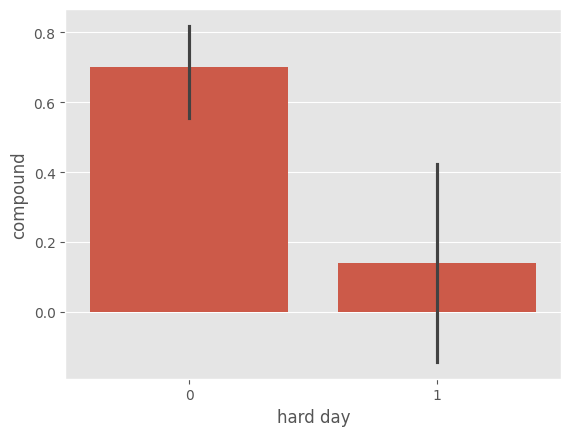

In [18]:
sns.barplot(data=vaders, x='hard day', y='compound')

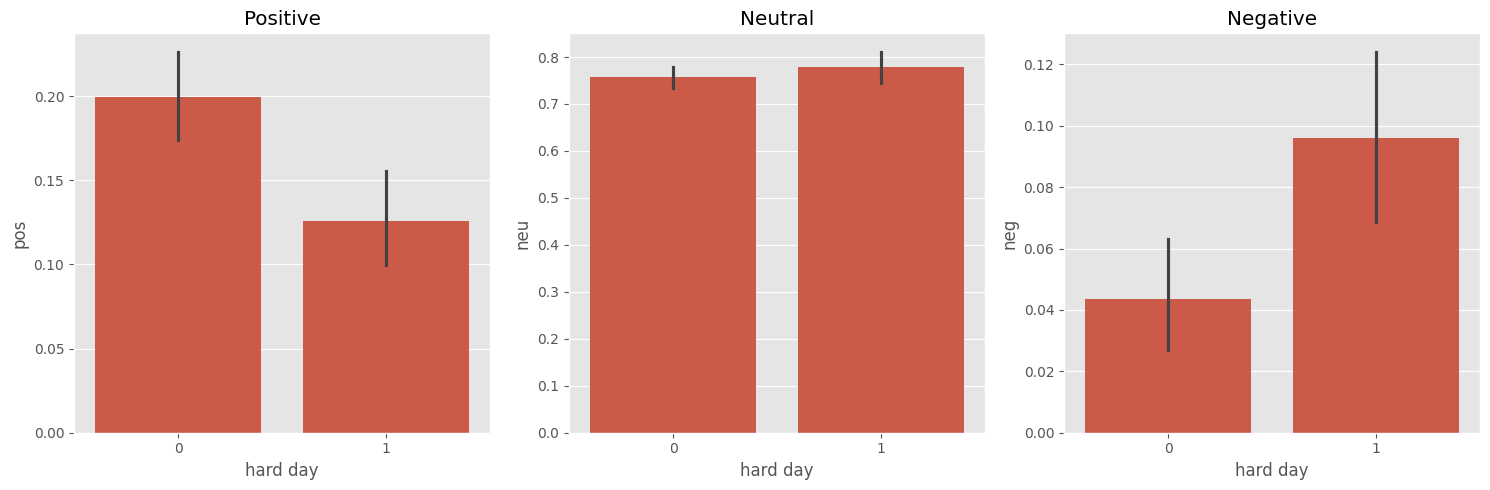

In [19]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='hard day', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='hard day', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='hard day', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()


Step3: Roberta Pretained Model

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
print(example)
sia.polarity_scores(example)

The workload for the NLP class was overwhelming. I found myself relentlessly working without a break. From 9 AM to 11 PM, I couldn't afford a moment away from my chair. It's like time just slipped by as I juggled between assignments, each one more challenging than the last. My brain was constantly buzzing, trying to grasp complex algorithms and theories. Despite the exhaustion, there's a sense of accomplishment in conquering each problem. With this pace, I can only hope for a reprieve soon.


{'neg': 0.033, 'neu': 0.853, 'pos': 0.115, 'compound': 0.6911}

In [26]:
encoded_text=tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
socres = output[0][0].detach().numpy()
scores = softmax(socres)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    }
scores_dict


{'roberta_neg': np.float32(0.1596949),
 'roberta_neu': np.float32(0.37490574),
 'roberta_pos': np.float32(0.46539938)}

In [28]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output = model(**encoded_text)
  socres = output[0][0].detach().numpy()
  scores = softmax(socres)
  scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    }
  return scores_dict



In [35]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text = row['diary_entry']
    myid = row['id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename={}
    for key,value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id {myid}')
    break

  0%|          | 0/60 [00:00<?, ?it/s]

In [38]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [40]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'diary_entry', 'food',
       'philosophy podcast', 'drinking', 'coffee', 'watching', 'a fun event',
       'I was stressed', 'all day', 'evening', 'morning', 'meeting friends',
       'I had an awful day', 'so many thoughts going on', 'struggling',
       'tragedy', 'enjoy a concert', 'watching movie', 'celebrating birthday',
       'feeling uneasy', 'new game I played', 'something exciting and fun',
       'i was in pain', 'holiday season', 'turkey eating experience',
       'planning for christmas',
       'I wanted to do something but that did not go well as I thought',
       'hard day'],
      dtype='object')

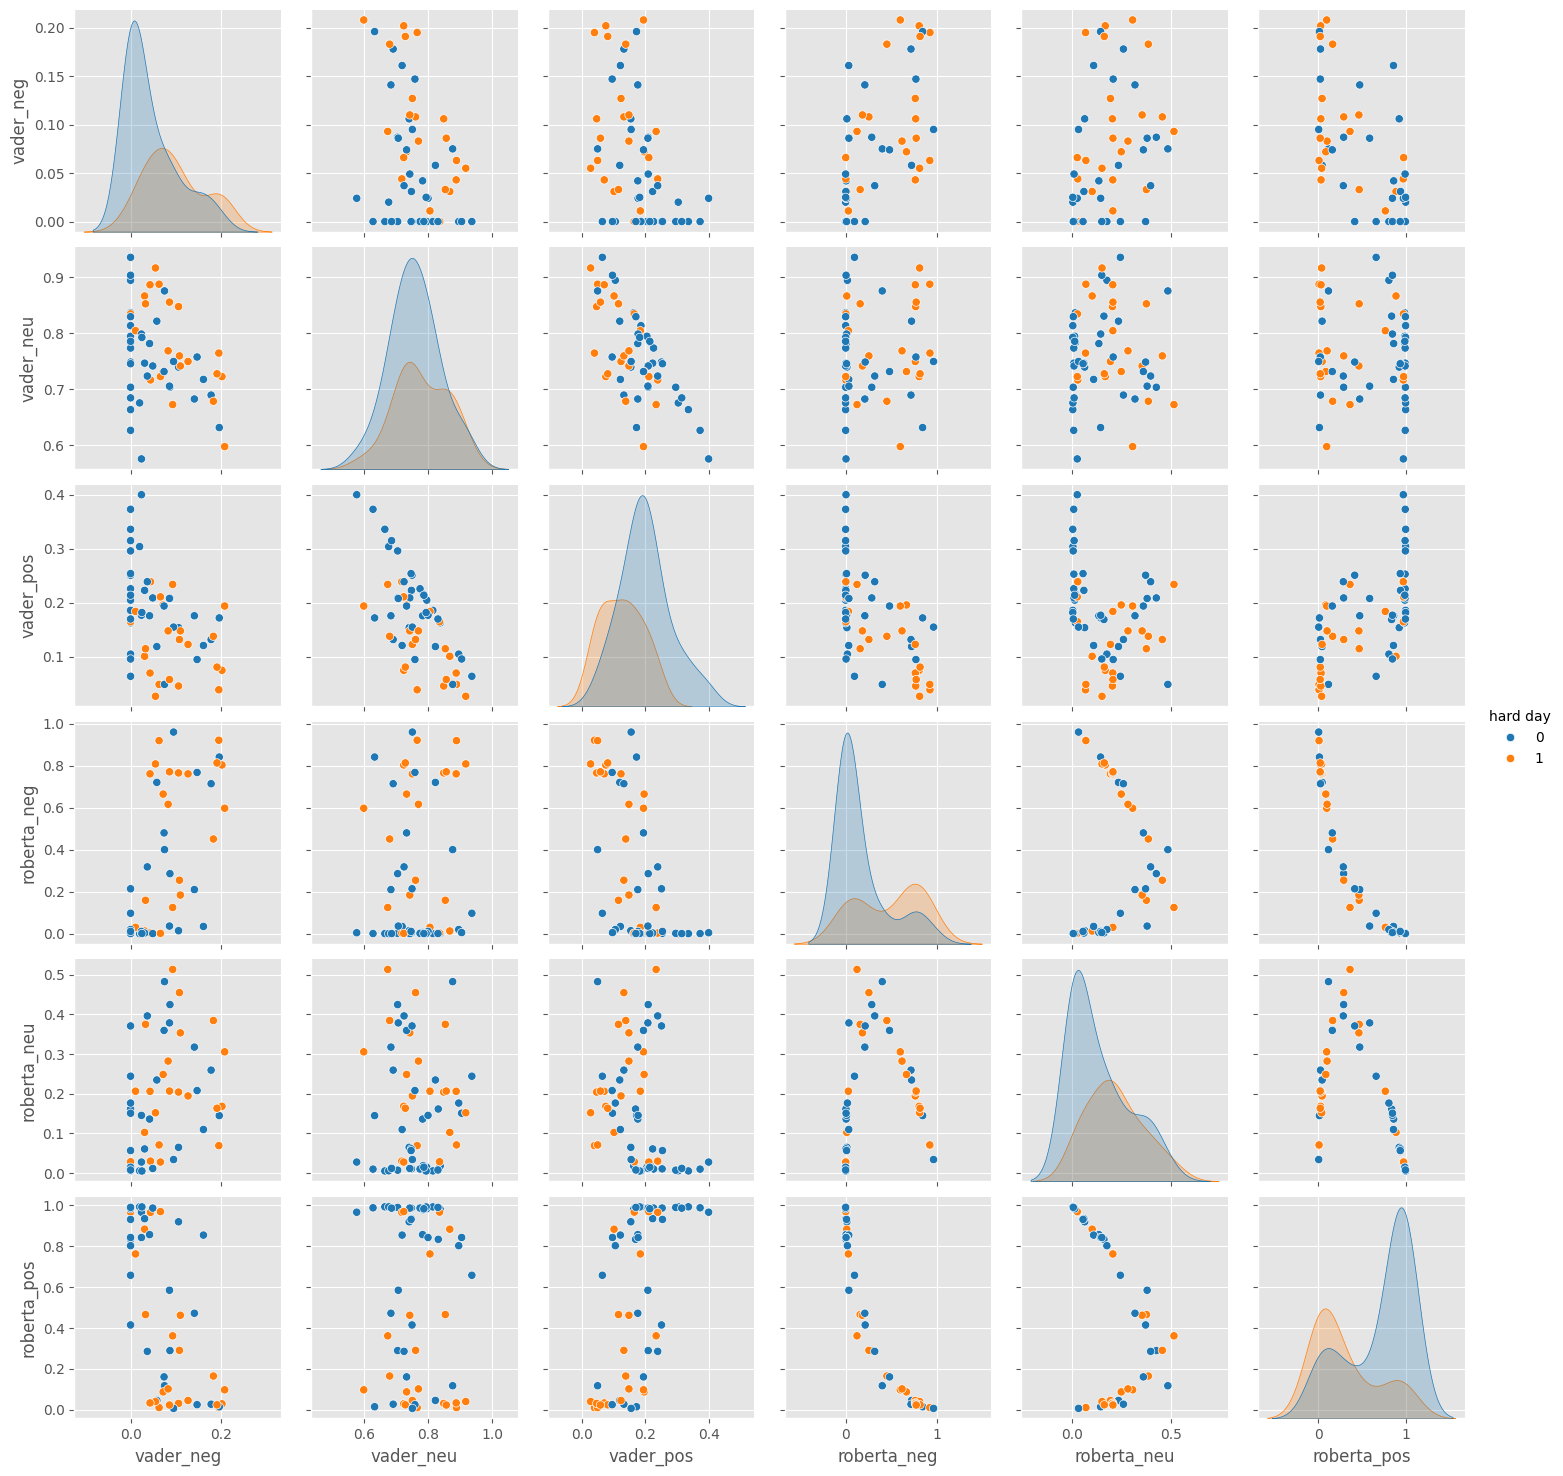

In [42]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='hard day',
            palette='tab10')
plt.show()

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
